# DATA EXPLORATION

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
from itertools import product
from scipy.stats import skewnorm

In [2]:
path = "C:/Users/Asus FX516P 9775/Documents/GitHub/data-mining/src"

dataCustomer: DataFrame = pd.read_csv(path + "/data/DM_AIAI_CustomerDB.csv")
dataFlights: DataFrame = pd.read_csv(path + "/data/DM_AIAI_FlightsDB.csv")

In [3]:
dataCustomer.head()


,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [4]:
dataCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [5]:
dataCustomer.shape

(16921, 21)

In [6]:
dataFlights.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [7]:
dataFlights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [8]:
dataFlights.shape

(608436, 10)

In [9]:
dataCustomer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [11]:
dataCustomer_central = dataCustomer.copy()


dataCustomer_central['Income'] = dataCustomer_central.groupby('Education')['Income'].transform(lambda x: x.fillna(x.median()))
dataCustomer_central['Customer Lifetime Value'] = dataCustomer_central.groupby('Education')['Customer Lifetime Value'].transform(lambda x: x.fillna(x.median()))
dataCustomer_central.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                         0
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value        0
EnrollmentType                 0
dtype: int64

In [ ]:
dataCustomer_central.loc[dataCustomer_central['Education'] == 'College', 'Income'] = dataCustomer_central.loc[dataCustomer_central['Education'] == 'College', 'Income'].replace(0, np.nan)
dataCustomer_central['Income'].fillna(dataCustomer_central['Income'].median(), inplace=True)


C:\Users\Asus FX516P 9775\AppData\Local\Temp\ipykernel_4216\4255677277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataCustomer_central['Income'].fillna(dataCustomer_central['Income'].median(), inplace=True)


np.int64(0)

In [14]:
dataCustomer_central['Loyalty#'].value_counts()

Loyalty#
678205    3
622975    2
746226    2
156031    2
849813    2
         ..
612905    1
679908    1
704150    1
869743    1
608758    1
Name: count, Length: 16757, dtype: int64

In [16]:
dataCustomer_central = dataCustomer_central[~dataCustomer_central['Loyalty#'].duplicated(keep=False)]
dataCustomer_central['Loyalty#'].duplicated().sum()
print("Remaining rows:", len(dataCustomer_central))

Remaining rows: 16594


In [19]:
Q1 = dataCustomer_central['Customer Lifetime Value'].quantile(0.25)
Q3 = dataCustomer_central['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataCustomer_central[(dataCustomer_central['Customer Lifetime Value'] < lower_bound) | (dataCustomer_central['Customer Lifetime Value'] > upper_bound)]
print(f"Number of Customer Lifetime Value outliers: {len(outliers)}")

Number of Customer Lifetime Value outliers: 1467


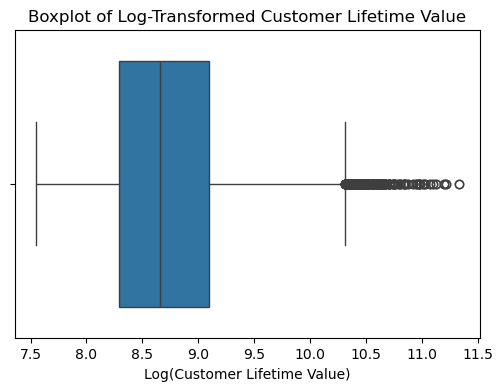

Skewness before log: 3.0796614356370555
Skewness after log: 0.5753986074651322


In [23]:


# Create a new column for visualization only
dataCustomer_central['log_CLV'] = np.log1p(dataCustomer_central['Customer Lifetime Value'])  # log1p handles zeros safely

plt.figure(figsize=(6,4))
sns.boxplot(x=dataCustomer_central['log_CLV'])
plt.title('Boxplot of Log-Transformed Customer Lifetime Value')
plt.xlabel('Log(Customer Lifetime Value)')
plt.show()

print("Skewness before log:", dataCustomer_central['Customer Lifetime Value'].skew())
print("Skewness after log:", dataCustomer_central['log_CLV'].skew())

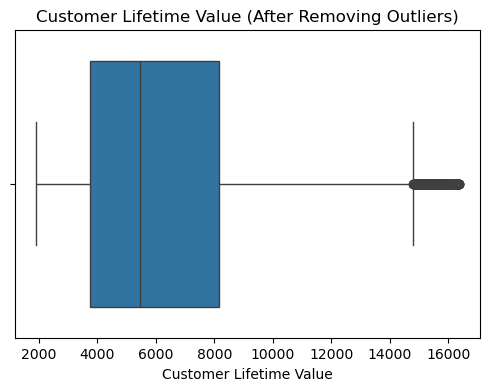

In [25]:
dataCustomer_central = dataCustomer_central[(dataCustomer_central['Customer Lifetime Value'] >= lower_bound) &
                    (dataCustomer_central['Customer Lifetime Value'] <= upper_bound)]

plt.figure(figsize=(6,4))
sns.boxplot(x=dataCustomer_central['Customer Lifetime Value'])
plt.title('Customer Lifetime Value (After Removing Outliers)')
plt.show()

In [29]:
dataFlights_central = dataFlights.copy()

dataFlights.duplicated().sum()

np.int64(2903)